## Pendahuluan

Saat ini nasabah `Bank Beta` pergi meninggalkan perusahaan: sedikit demi sedikit, jumlah mereka berkurang setiap bulannya. Para pegawai bank menyadari bahwa akan lebih menghemat biaya jika perusahaan fokus untuk mempertahankan nasabah lama mereka yang setia daripada menarik nasabah baru.

Pada kasus ini, kita bertugas untuk memprediksi `apakah seorang nasabah akan segera meninggalkan bank atau tidak`. Kita memiliki data terkait perilaku para klien di masa lalu dan riwayat pemutusan kontrak mereka dengan bank.

Dengan rumusan masalah:
- Mengecek F1 Score minimal 0,59 untuk test dataset.
- Bandingkan metrik AUC-ROC dengan skor F1.


## Konten <a id='back'></a>

* [1. Pendahuluan](#intro)
* [2. Konten](#back)
  * [2.1 Mempersiapkan Dataset](#cont_1)
    * [2.1.1 Memuat Library](#cont_2) 
    * [2.1.2 Memuat Dataset](#cont_3)
  * [2.2 Mengecek Nilai yang Hilang](#cont_4)
  * [2.3 Mengecek Duplikasi Data](#cont_5)
  * [2.4 Mengubah Tipe Data](#cont_6)
* [3. Pengecekan Encoding Data dengan OHE](#cont_7)
* [4. Exploratory Data Analysis (EDA)]((#cont_8) 
* [5. Balance Class]((#cont_9)  
  * [5.1 UpSampling](#cont_10)
  * [5.2 DownSampling](#cont_11)
* [6. Pelatihan Model](#cont_12)
  * [6.1 Decision Tree](#cont_13)
  * [6.2 Random Forest](#cont_14)
  * [6.4 Regresi Logistik](#cont_15)
  * [6.4 Test Dataset](#cont_16)
* [4. Kesimpulan Umum](#cont_17)

### Mempersiapkan Dataset

Tahap pertama yang perlu dilakukan adalah mempersiapkan dataset mulai dari memuat library yang diperlukan, memuat dataset , mengecek sampel data, mengecek nilai yang hilang, mengecek duplikat dan mengecek tipe data.

#### Memuat Library

Sebelumnya kita akan menggunakan beberapa library berikut:
- `Pandas`: Untuk manipulasi dan analisis data.
- `Scikit-learn`: Untuk pemodelan dan evaluasi model.
- `Matplotlib dan Seaborn`: Untuk visualisasi data.
- `NumPy`: Untuk operasi matematika.

In [2]:
#Import Library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns


#### Memuat Dataset

Mari kita muat datasetnya.

In [3]:
# Memuat dataset bank Beta
data = pd.read_csv('/datasets/Churn.csv')

In [4]:
# Cek informasi data dan sampel data
data.info()

# Cek sampel data
data.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
113,114,15591100,Chiemela,675,Spain,Male,36,9.0,106190.55,1,0,1,22994.32,0
2101,2102,15778934,Napolitani,678,Spain,Female,49,8.0,0.00,2,0,1,98090.69,0
1179,1180,15814032,Hsieh,807,Germany,Female,31,1.0,93460.47,2,0,0,172782.69,0
2914,2915,15733883,Ward,604,France,Male,28,7.0,0.00,2,0,0,58595.64,0
8427,8428,15806771,Yefremova,753,France,Female,40,0.0,3768.69,2,1,0,177065.24,1


Data berisi kolom-kolom berikut:

- `RowNumber` — indeks string data
- `CustomerId` — ID pelanggan
- `Surname` — nama belakang
- `CreditScore` — skor kredit
- `Geography` — negara domisili
- `Gender` — gender
- `Age` — umur
- `Tenure` — jangka waktu jatuh tempo untuk deposito tetap nasabah (tahun)
- `Balance` — saldo rekening
- `NumOfProducts` — jumlah produk bank yang digunakan oleh nasabah
- `HasCrCard` — apakah nasabah memiliki kartu kredit (1 - jika ya; 0 - jika tidak)
- `IsActiveMember` — tingkat keaktifan nasabah (1 - jika ya; 0 - jika tidak)
- `EstimatedSalary` — estimasi gaji

 **Target**
- `Exited` — apakah nasabah telah berhenti (1 - jika ya; 0 - jika tidak)

### Mengecek Nilai yang Hilang

Mari kita cek apakah ada data yang hilang dari dataset.

In [5]:
# Cek apakah ada data nilai yang hilang

data_missed = data.isna().sum().to_frame()
data_missed = data_missed.rename(columns={0: 'missing_values'})
data_missed['% of total'] = (data_missed['missing_values'] / data.shape[0]).round(2)
data_missed.sort_values(by='missing_values', ascending=False)

,missing_values,% of total
Tenure,909,0.09
RowNumber,0,0.00
CustomerId,0,0.00
Surname,0,0.00
CreditScore,0,0.00
Geography,0,0.00
Gender,0,0.00
Age,0,0.00
Balance,0,0.00
NumOfProducts,0,0.00


Kita lihat ada data yang hilang pada kolom `Tenure` sebanyak `909`. Kita akan perbaiki data yang hilang ini dengan mengubah nilai yang hilang `Nan` menjadi `0`.

In [6]:
# Ubah Data yang hilang menjadi angka 0
data['Tenure'].fillna(0, inplace=True)

In [7]:
# Kita cek kembali data yang hilang
data_missed = data.isna().sum().to_frame()
data_missed = data_missed.rename(columns={0: 'missing_values'})
data_missed['% of total'] = (data_missed['missing_values'] / data.shape[0]).round(2)
data_missed.sort_values(by='missing_values', ascending=False)

,missing_values,% of total
RowNumber,0,0.0
CustomerId,0,0.0
Surname,0,0.0
CreditScore,0,0.0
Geography,0,0.0
Gender,0,0.0
Age,0,0.0
Tenure,0,0.0
Balance,0,0.0
NumOfProducts,0,0.0


Saat ini kita sudah tidak mempunyai nilai yang hilang. Kita lanjutkan tahap selanjutnya.

### Mengecek Duplikasi data

Mari kita cek apakah dataset ada duplikasinya.

In [8]:
# mengecek duplikasi
data.duplicated().sum()

0

Dari hasil pengecekan dataset tidak ada data yang duplikat.

### Mengubah Tipe Data

Dari pengamatan sebelumnya mari kita rubah kolom `Tenure` dari `float` menjadi `integer`

In [9]:
# mengubah tipe data kolom Tenure
data['Tenure'] = data['Tenure'].astype('int')

# mengecek tipe data yang baru
data.info()

# menampilkan sampel data
data.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3251,3252,15750335,Paterson,850,Germany,Male,43,0,108508.82,3,1,0,184044.80,1
9470,9471,15694859,McLean,751,Germany,Female,28,10,132932.14,2,1,1,46630.47,0
1794,1795,15606841,Ibbott,823,France,Male,38,1,0.00,2,1,0,156603.70,0
7343,7344,15763194,Milanesi,643,France,Male,34,7,0.00,2,0,1,100304.13,0
7315,7316,15593345,Bradbury,502,Germany,Female,33,6,125241.17,2,1,1,158736.07,0


Kita telah berhasil mengubah tipe data dari `float` menjadi `integer`.

## Pengecekan Encoding Data dengan OHE

Setelah dataset sudah kita siapkan, mari kita lanjutkan dengan pengecekan `Encoding Data` dengan `OHE`.

In [10]:
# Data Encoding tanpa kolom "Surname"
data_encoded = pd.get_dummies(data.drop(['Surname'], axis=1), drop_first=True)

# Pisahkan fitur dan target
target = data_encoded['Exited']
features = data_encoded.drop(['Exited'], axis=1)

# Pisahkan dataset menjadi data latih dan data validasi
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345
)

# Daftar fitur numerik
numeric = ['RowNumber', 'CustomerId']

# Hapus kolom-kolom numerik dari daftar fitur numerik
numeric = [col for col in numeric if col not in features_train.columns]

# Menampilkan ukuran data latih dan data validasi
print("Ukuran Data Latih:", features_train.shape)
print("Ukuran Data Validasi:", features_valid.shape)

Ukuran Data Latih: (7500, 13)
Ukuran Data Validasi: (2500, 13)


Dari pengecekan OHE kita dapatkan:

**- Ukuran Data Latih (7500, 13):**

1. Data latih terdiri dari 7500 baris dan 13 kolom.
2. Setiap kolom mewakili suatu fitur atau variabel yang digunakan dalam model. Dalam hal ini, terdapat 7500 fitur.

**- Ukuran Data Validasi (2500, 13):**
1. Data validasi terdiri dari 2500 baris dan 13 kolom.
2. Jumlah kolom sama dengan data latih karena kita menggunakan skalar yang sama untuk transformasi.

Kita lanjutkan ke tahap selanjutnya.


## Exploratory Data Analysis (EDA) 

`Exploratory Data Analysis (EDA)` adalah suatu proses analisis data untuk memahami dan meringkas karakteristik utama dari dataset. Dan kita akan menggunakan `EDA` untuk tahap awal setelah kita melakukan `OHE`.

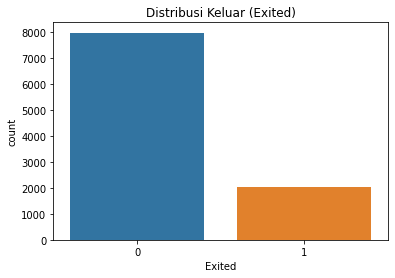

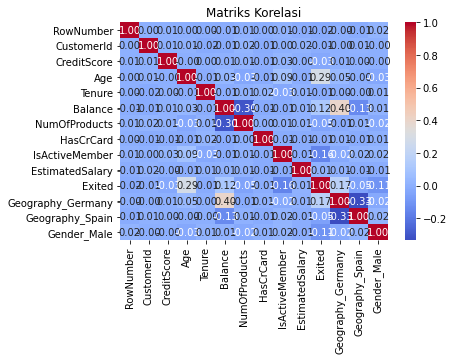

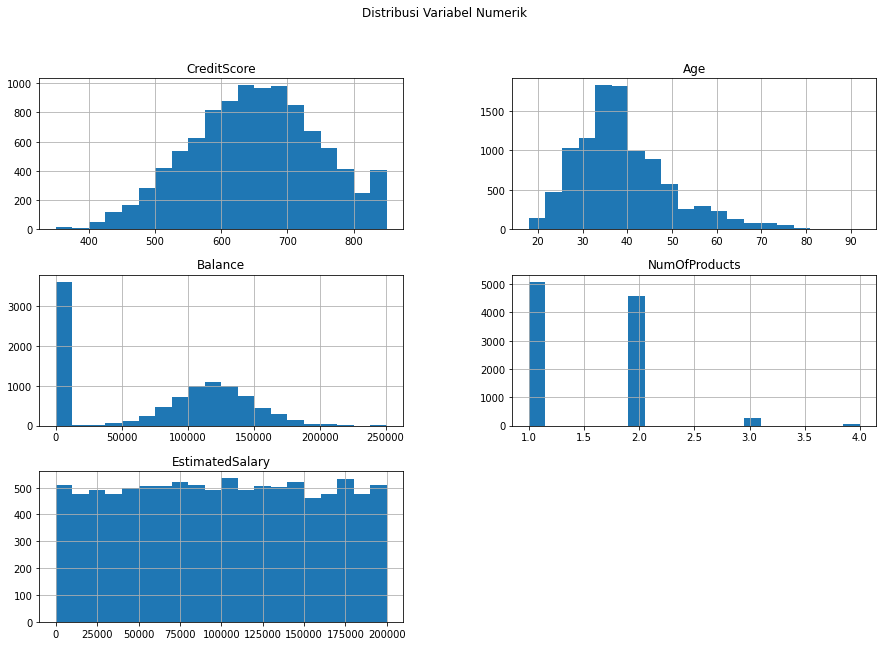

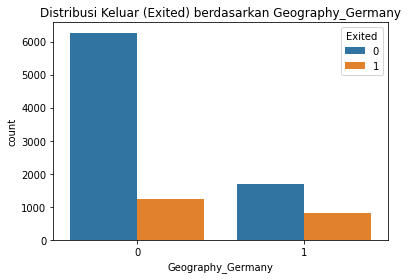

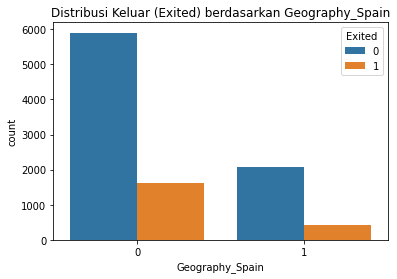

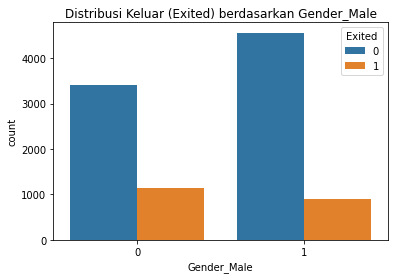

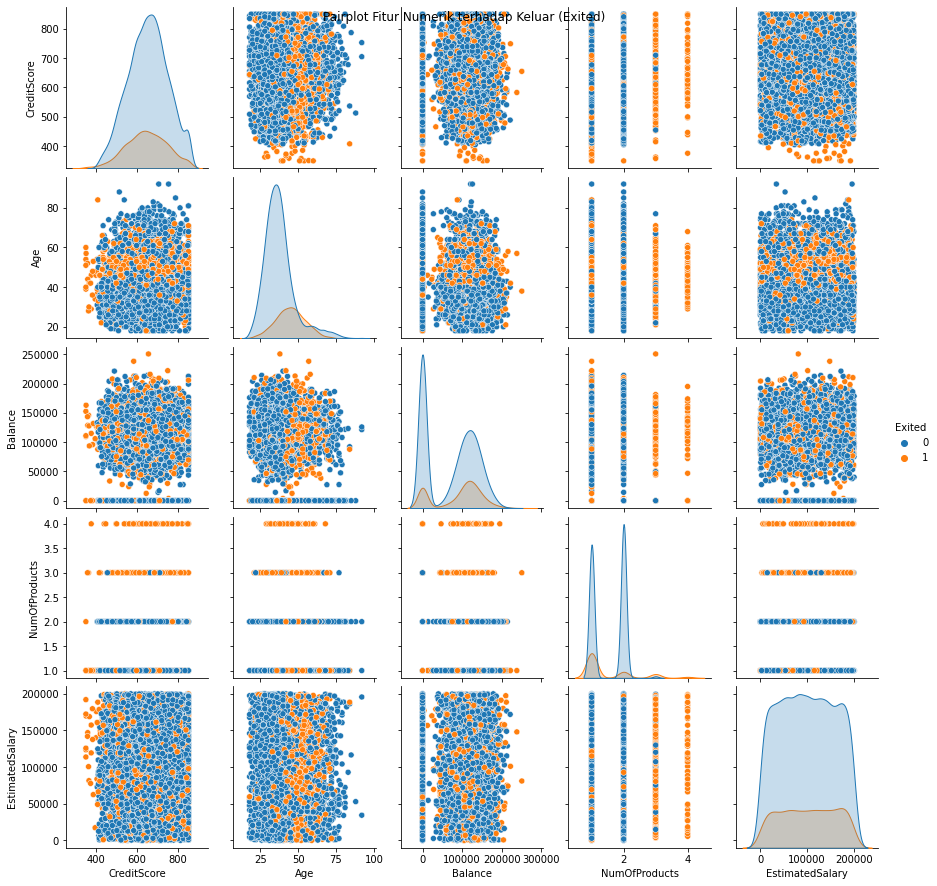

In [11]:
# Visualisasi distribusi variabel target
sns.countplot(x='Exited', data=data_encoded)
plt.title('Distribusi Keluar (Exited)')
plt.show()

# Korelasi antar fitur
correlation_matrix = data_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi')
plt.show()

# Distribusi variabel numerik
numeric_features = ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary']
data_encoded[numeric_features].hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribusi Variabel Numerik')
plt.show()

# Visualisasi distribusi variabel kategorikal hasil dari OHE
categorical_ohe_features = ['Geography_Germany', 'Geography_Spain', 'Gender_Male']
for feature in categorical_ohe_features:
    sns.countplot(x=feature, hue='Exited', data=data_encoded)
    plt.title(f'Distribusi Keluar (Exited) berdasarkan {feature}')
    plt.show()

# Pairplot untuk melihat hubungan antara beberapa fitur numerik
sns.pairplot(data_encoded[numeric_features + ['Exited']], hue='Exited', diag_kind='kde')
plt.suptitle('Pairplot Fitur Numerik terhadap Keluar (Exited)')
plt.show()

Jika kita lihat dari EDA, untuk nasabah yang keluar lebih sedikit daripada yang tidak keluar, maka kita akan lanjutkan pengecekan lebih lanjut.

## Balance Class

Kita akan melakukan pengecekan `Balance Class`, setelah sebelumnya mengecek EDA.

In [12]:
# Cek distribusi kelas
class_distribution = target.value_counts()
print("Distribusi Kelas:")
print(class_distribution)

Distribusi Kelas:
0    7963
1    2037
Name: Exited, dtype: int64


Dari distribusi class, terlihat bahwa nilai `0` sebesar `7963` lebih besar dari nilai `1` sebesar `2037`.

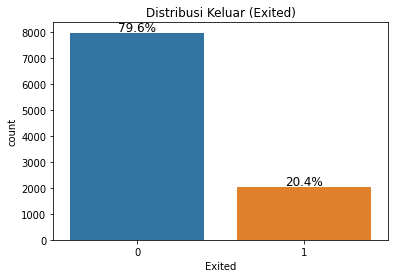

In [13]:
# Visualisasi distribusi kelas
ax = sns.countplot(x='Exited', data=data)
plt.title('Distribusi Keluar (Exited)')

# Menambahkan anotasi
total_data = len(data)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_data)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

Dari  visualisai nilai `0` sebesar `79.6%` dan nilai `1` sebesar `20.4%`.

In [14]:
# Cek jumlah sampel
class_ratio = class_distribution[1] / class_distribution[0]
print(f"Perbandingan Jumlah Sampel: {class_ratio:.2f}")

Perbandingan Jumlah Sampel: 0.26


Perbandingan Jumlah Sampel adalah rasio antara jumlah sampel kelas positif dengan jumlah sampel kelas negatif dalam dataset. Jika perbandingan ini dinyatakan sebagai desimal, seperti 0.26, itu berarti ada sekitar 26% dari jumlah sampel kelas positif dibandingkan dengan jumlah sampel kelas negatif. Maka jika nilai keseimbangan adalah 1.0, maka nilai 0.26 jauh dari keseimbangan, kita lanjutkan proses untuk mengecek kembali ketidakseimbangan kelas.

In [15]:
#Cek ketidakeimbangan kelas
# Menghitung jumlah sampel untuk kelas positif (1) dan kelas negatif (0)
count_class_positive = len(data[data['Exited'] == 1])
count_class_negative = len(data[data['Exited'] == 0])

# Menghitung rasio jumlah sampel
ratio_samples = count_class_positive / count_class_negative

# Menampilkan hasil
print(f"Jumlah Sampel Kelas Positif (1): {count_class_positive}")
print(f"Jumlah Sampel Kelas Negatif (0): {count_class_negative}")
print(f"Perbandingan Jumlah Sampel: {ratio_samples:.2f}")

# Mengecek apakah terdapat ketidakseimbangan
if ratio_samples < 1.0:
    print("Terdapat ketidakseimbangan kelas.")
else:
    print("Distribusi kelas seimbang atau mendekati seimbang.")


Jumlah Sampel Kelas Positif (1): 2037
Jumlah Sampel Kelas Negatif (0): 7963
Perbandingan Jumlah Sampel: 0.26
Terdapat ketidakseimbangan kelas.


Dari pengecekan dapat disimpulkan bahwa memang terdapat ketidakseimbangan kelas, sebagaimana pengecekan awal saat mengecek distribusi kelas. Selanjutkan kita akan menggunakan dua teknik untuk memperbaiki ketidaksimbangan kelas yaitu Upsampling dan Downsampling.

### UpSampling

Kita mulai dengan metode pertama yaitu Upsampling.

Distribusi Kelas Setelah Upsampling:
1    6042
0    5902
Name: Exited, dtype: int64


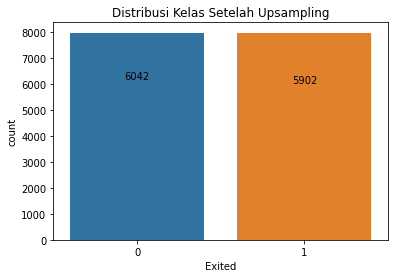

In [16]:
from sklearn.utils import resample

# Pisahkan kelas positif (Exited=1) dan kelas negatif (Exited=0)
positive_class = data[data['Exited'] == 1]
negative_class = data[data['Exited'] == 0]

# Upsampling kelas positif
positive_class_upsampled = resample(positive_class, replace=True, n_samples=len(negative_class), random_state=42)

# Gabungkan kelas positif yang sudah diupsample dengan kelas negatif
data_upsampled = pd.concat([positive_class_upsampled, negative_class])

# Pisahkan fitur dan target pada data yang sudah diupsample
target_upsampled = data_upsampled['Exited']
features_upsampled = data_upsampled.drop(['Exited'], axis=1)

# Pisahkan dataset menjadi data latih dan data validasi
features_train_upsampled, features_valid_upsampled, target_train_upsampled, target_valid_upsampled = train_test_split(
    features_upsampled, target_upsampled, test_size=0.25, random_state=12345
)

# Setelah upsampling, cek distribusi kelas
upsampled_class_distribution = pd.Series(target_train_upsampled).value_counts()
print("Distribusi Kelas Setelah Upsampling:")
print(upsampled_class_distribution)

# Visualisasi distribusi kelas
sns.countplot(x='Exited', data=data_upsampled)
plt.title('Distribusi Kelas Setelah Upsampling')

# Menambahkan anotasi
for index, value in enumerate(upsampled_class_distribution):
    plt.text(index, value + 50, str(value), ha='center', va='bottom')

plt.show()

Setelah kita lakukan upsampling, distribusi kelas saat ini sudah terlihat mendekati seimbang dari sebelumnya dimana untuk `kelas 1 sebanyak 6042` dan `kelas 0  sebanyak 5902`. Kita lanjut bandingkan dengan downsampling.

### DownSampling

Distribusi Kelas Setelah Downsampling:
1    1534
0    1521
Name: Exited, dtype: int64


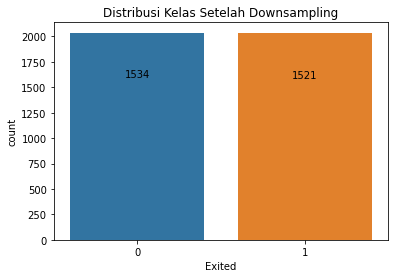

In [17]:
from sklearn.utils import resample

# Pisahkan kelas positif (Exited=1) dan kelas negatif (Exited=0)
positive_class = data[data['Exited'] == 1]
negative_class = data[data['Exited'] == 0]

# Downsampling kelas negatif
negative_class_downsampled = resample(negative_class, replace=False, n_samples=len(positive_class), random_state=42)

# Gabungkan kelas positif dengan kelas negatif yang sudah didownsample
data_downsampled = pd.concat([negative_class_downsampled, positive_class])

# Pisahkan fitur dan target pada data yang sudah didownsample
target_downsampled = data_downsampled['Exited']
features_downsampled = data_downsampled.drop(['Exited'], axis=1)

# Pisahkan dataset menjadi data latih dan data validasi
features_train_downsampled, features_valid_downsampled, target_train_downsampled, target_valid_downsampled = train_test_split(
    features_downsampled, target_downsampled, test_size=0.25, random_state=12345
)

# Setelah downsampling, cek distribusi kelas
downsampled_class_distribution = pd.Series(target_train_downsampled).value_counts()
print("Distribusi Kelas Setelah Downsampling:")
print(downsampled_class_distribution)

# Visualisasi distribusi kelas
sns.countplot(x='Exited', data=data_downsampled)
plt.title('Distribusi Kelas Setelah Downsampling')

# Menambahkan anotasi
for index, value in enumerate(downsampled_class_distribution):
    plt.text(index, value + 50, str(value), ha='center', va='bottom')

plt.show()

Setelah kita lakukan upsampling, distribusi kelas saat ini sudah terlihat mendekati seimbang dari sebelumnya dimana untuk `kelas 1 sebanyak 1534` dan `kelas 0  sebanyak 1521`. Kita lanjut bandingkan dengan downsampling.

Dari perbandingan teknik upsampling dan downsampling, kita akan menggunakan, hasil dari teknik upsampling untuklangkah selanjutnya,

## Pelatihan Model

Kita lanjutkan dengan Pelatihan Model dimana sebelumnya kita sudah memisahkan data 75% data latih dan 25% data uji.

Dalam pelatihan model kita akan menggunakan perbandingan 3 pelatihan model sebagai perbandingan.

- Decision Tree
- Random Forest
- Regresi Logistik

### Decision Tree

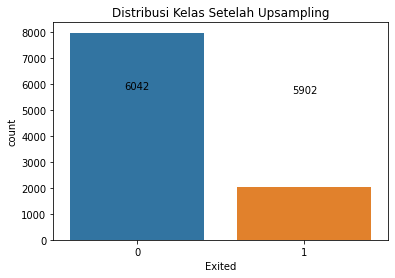

Decision Tree Metrics (Upsampled Data):
Accuracy: 0.7704
Precision: 0.4643510054844607
Recall: 0.4747663551401869
F1 Score: 0.4695009242144177
ROC AUC Score: 0.6628284701909586


In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Fungsi untuk mengevaluasi model
def evaluate_model(predictions, target_test):
    accuracy = accuracy_score(target_test, predictions)
    precision = precision_score(target_test, predictions)
    recall = recall_score(target_test, predictions)
    f1 = f1_score(target_test, predictions)
    roc_auc = roc_auc_score(target_test, predictions)
    
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("ROC AUC Score:", roc_auc)
    
# Visualisasi distribusi kelas
sns.countplot(x='Exited', data=data_encoded)
plt.title('Distribusi Kelas Setelah Upsampling')

# Menambahkan anotasi
for index, value in enumerate(upsampled_class_distribution):
    plt.text(index, value + 50, str(value), ha='center', va='top')

plt.show()

# Inisialisasi model Decision Tree
dt_model_upsampled = DecisionTreeClassifier(random_state=42)

# Melatih model
dt_model_upsampled.fit(features_train, target_train)

# Melakukan prediksi pada data validasi yang sudah diupsample
dt_predictions_upsampled = dt_model_upsampled.predict(features_valid)

# Evaluasi model Decision Tree setelah upsampling
print("Decision Tree Metrics (Upsampled Data):")
evaluate_model(dt_predictions_upsampled, target_valid)

Hasil evaluasi model Decision Tree pada data yang sudah diupsample adalah sebagai berikut:

- Accuracy (Akurasi): 77.04%
- Precision (Presisi): 46.44%
- Recall (Recall atau Sensitivitas): 47.48%
- F1 Score: 46.95%
- ROC AUC Score: 66.28%

Dari nilai F1 Score dibawah 59%, maka tidak memenuhi untuk test dataset.

### Random Forest

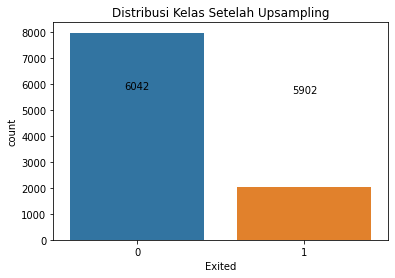

Random Forest Metrics (Upsampled Data):
Accuracy: 0.8528
Precision: 0.7909407665505227
Recall: 0.42429906542056073
F1 Score: 0.5523114355231143
ROC AUC Score: 0.6968823571377613


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# Fungsi untuk mengevaluasi model
def evaluate_model(predictions, target_test):
    accuracy = accuracy_score(target_test, predictions)
    precision = precision_score(target_test, predictions)
    recall = recall_score(target_test, predictions)
    f1 = f1_score(target_test, predictions)
    roc_auc = roc_auc_score(target_test, predictions)
    
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("ROC AUC Score:", roc_auc)

# Visualisasi distribusi kelas
sns.countplot(x='Exited', data=data_encoded)
plt.title('Distribusi Kelas Setelah Upsampling')

# Menambahkan anotasi
for index, value in enumerate(upsampled_class_distribution):
    plt.text(index, value + 50, str(value), ha='center', va='top')

plt.show()

# Inisialisasi model Random Forest
rf_model_upsampled = RandomForestClassifier(random_state=42)

# Melatih model
rf_model_upsampled.fit(features_train, target_train)

# Melakukan prediksi pada data validasi yang sudah diupsample
rf_predictions_upsampled = rf_model_upsampled.predict(features_valid)

# Evaluasi model Random Forest setelah upsampling
print("Random Forest Metrics (Upsampled Data):")
evaluate_model(rf_predictions_upsampled, target_valid)

Hasil evaluasi model Random Forest pada data yang sudah diupsample adalah sebagai berikut:

- Accuracy (Akurasi): 85.28%
- Precision (Presisi): 79.09%
- Recall (Recall atau Sensitivitas): 42.43%
- F1 Score: 55.23%
- ROC AUC Score: 69.69%

Nilai F1 Score dibwah 59% sehingga tidak bisa digunakan untuk test dataset.


### Regresi Logistik

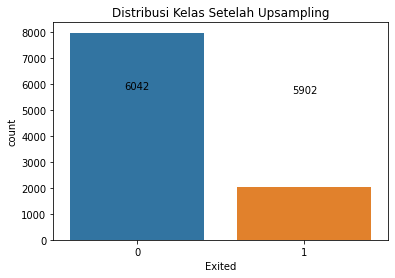

Logistic Regression Metrics (Upsampled Data):
Accuracy: 0.786
Precision: 1.0
Recall: 0.0
F1 Score: 0.0
ROC AUC Score: 0.5


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.exceptions import UndefinedMetricWarning
import warnings

# Fungsi untuk mengevaluasi model
def evaluate_model(predictions, target_test):
    accuracy = accuracy_score(target_test, predictions)
    precision = precision_score(target_test, predictions, zero_division=1)
    recall = recall_score(target_test, predictions)
    f1 = f1_score(target_test, predictions)
    roc_auc = roc_auc_score(target_test, predictions)
    
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("ROC AUC Score:", roc_auc)

# Visualisasi distribusi kelas
sns.countplot(x='Exited', data=data_encoded)
plt.title('Distribusi Kelas Setelah Upsampling')

# Menambahkan anotasi
for index, value in enumerate(upsampled_class_distribution):
    plt.text(index, value + 50, str(value), ha='center', va='top')

plt.show()

# Inisialisasi model Regresi Logistik
logistic_model_upsampled = LogisticRegression(random_state=42)

# Melatih model
logistic_model_upsampled.fit(features_train, target_train)

# Melakukan prediksi pada data validasi yang sudah diupsample
logistic_predictions_upsampled = logistic_model_upsampled.predict(features_valid)

# Evaluasi model Regresi Logistik setelah upsampling
print("Logistic Regression Metrics (Upsampled Data):")
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=UndefinedMetricWarning)
    evaluate_model(logistic_predictions_upsampled, target_valid)

Hasil evaluasi model Regresi Logistik pada data yang sudah diupsample menunjukkan:

- Accuracy (Akurasi): 78.6% - Persentase total prediksi yang benar dari keseluruhan data uji.
- Precision: 100% - Dari semua prediksi positif, 100% di antaranya adalah benar.
- Recall (Sensitivitas): 0% - Model tidak berhasil memprediksi instance yang sebenarnya positif.
- F1 Score: 0 - Rata-rata harmonik dari presisi dan recall. Nilainya 0 karena recall adalah 0.
- ROC AUC Score: 50% - Menunjukkan bahwa model tidak memiliki kemampuan membedakan antara kelas positif dan negatif.

Dengan nilai recall dan F1 Score yang rendah, model mungkin tidak efektif dalam memprediksi kelas minoritas, dan perlu dievaluasi lebih lanjut atau dioptimalkan untuk meningkatkan kinerjanya.


Maka, dari ketiga pelatihan model yang mendekati nilai F1 score mimimum 59%, adalah Random Forest yaitu 55%. Maka, kita akan tingkatkan random Forestnya, dengan menambahkan n_estimators dan max_depth.

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Pisahkan dataset menjadi data latih (75% dan data validasi (20%)
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345
)

# Inisialisasi model Random Forest dengan parameter yang diubah
rf_model_upsampled_tuned = RandomForestClassifier(
    n_estimators= 86,  # Ubah nilai n_estimators sesuai kebutuhan
    max_depth=13,  # Ubah nilai max_depth sesuai kebutuhan
    random_state=42
)

# Melatih model
rf_model_upsampled_tuned.fit(features_train, target_train)

# Melakukan prediksi pada data validasi yang sudah diupsample
rf_predictions_upsampled_tuned = rf_model_upsampled_tuned.predict(features_valid)

# Evaluasi model Random Forest setelah upsampling
print("Random Forest Metrics (Upsampled Data - Tuned):")
evaluate_model(rf_predictions_upsampled_tuned, target_valid)

Random Forest Metrics (Upsampled Data - Tuned):
Accuracy: 0.8596
Precision: 0.8333333333333334
Recall: 0.42990654205607476
F1 Score: 0.5672009864364982
ROC AUC Score: 0.7032484364224395


Kita sudah memberikan tambahan n_estimators = 86 dan max_depth = 13, namun hasil F1 Score masih 56,72%, maka kita akan tambahkan ambang batas, agar F1 Score menyentuh minimum 59%.

In [22]:
# Dapatkan probabilitas prediksi untuk kelas positif
rf_probs = rf_model_upsampled_tuned.predict_proba(features_valid)[:, 1]

# Tentukan ambang batas yang berbeda dan hitung skor F1
ambang_batas = [0.3, 0.4, 0.5, 0.6, 0.7]
for ambang in ambang_batas:
    prediksi_ambang_batas = (rf_probs > ambang).astype(int)
    skor_f1 = f1_score(target_valid, prediksi_ambang_batas)
    print(f"Ambang Batas: {ambang}, Skor F1: {skor_f1}")

Ambang Batas: 0.3, Skor F1: 0.6355475763016158
Ambang Batas: 0.4, Skor F1: 0.6133909287257019
Ambang Batas: 0.5, Skor F1: 0.5672009864364982
Ambang Batas: 0.6, Skor F1: 0.4879356568364611
Ambang Batas: 0.7, Skor F1: 0.3458646616541354


Dengan penambahan ambang batas, terlihat bahwa ambang batas 0.3 mempunyai nilai F1 score yang terbaik, maka kita akan aplikasikan ulang ke pelatihan model Random Forest.

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Pisahkan dataset menjadi data latih (75%) dan data validasi (25%)
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345
)

# Inisialisasi model Random Forest dengan parameter yang diubah
rf_model_upsampled_tuned = RandomForestClassifier(
    n_estimators=86,  # Ubah nilai n_estimators sesuai kebutuhan
    max_depth=13,  # Ubah nilai max_depth sesuai kebutuhan
    random_state=42
)

# Melatih model
rf_model_upsampled_tuned.fit(features_train, target_train)

# Melakukan prediksi pada data validasi yang sudah diupsample
rf_probs = rf_model_upsampled_tuned.predict_proba(features_valid)[:, 1]
rf_predictions_thresholded = (rf_probs > 0.3).astype(int)

# Evaluasi model Random Forest setelah upsampling
print("Random Forest Metrics (Upsampled Data - Tuned):")
evaluate_model(rf_predictions_thresholded, target_valid)

Random Forest Metrics (Upsampled Data - Tuned):
Accuracy: 0.8376
Precision: 0.6113989637305699
Recall: 0.6616822429906543
F1 Score: 0.6355475763016158
ROC AUC Score: 0.7735892130983806


Model Random Forest yang telah disesuaikan menunjukkan performa yang baik dengan ambang batas (threshold) 0.3 pada data validasi upsampled:

- Akurasi: 83.76%
- Presisi: 61.14%
- Recall: 66.17%
- F1 Score: 63.55%
- ROC AUC Score: 77.36%

Dan data ini dapat digunakan untuk test dataset, karena sudah memenuhi F1 score minimum 59% yaitu nilainya 63,55%.Selanjutnya,kita lakukan penggabungan dataset dan sanity check terlebih dahulu.

In [24]:
# Gabungkan data latih dan data validasi
features_combined = pd.concat([features_train, features_valid])
target_combined = pd.concat([target_train, target_valid])

# Print jumlah data dalam dataset gabungan
print("Jumlah Data Latih dan Validasi Gabungan:")
print("Jumlah Data Latih:", len(features_train))
print("Jumlah Data Validasi:", len(features_valid))
print("Jumlah Data Gabungan:", len(features_combined))

# Print nama dan jumlah kolom dalam dataset gabungan
print("\nNama Kolom dalam Dataset Gabungan:")
print(features_combined.columns)
print("\nJumlah Kolom dalam Dataset Gabungan:", len(features_combined.columns))

Jumlah Data Latih dan Validasi Gabungan:
Jumlah Data Latih: 7500
Jumlah Data Validasi: 2500
Jumlah Data Gabungan: 10000

Nama Kolom dalam Dataset Gabungan:
Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Geography_Germany', 'Geography_Spain', 'Gender_Male'],
      dtype='object')

Jumlah Kolom dalam Dataset Gabungan: 13


HSetelah kita lakukan penggabungan data didapatkan bahwa totdal baris sebanyak 10000 dan total kolom sebanyak 13. Kita lanjutkan test data.

### Test Dataset

Test Dataset untuk mengetahui secara keseluruhan data yang sudah kita olah sebelumnya.

In [25]:
# Gabungkan data latih dan data validasi
features_combined = pd.concat([features_train, features_valid])
target_combined = pd.concat([target_train, target_valid])

# Inisialisasi ulang model Random Forest dengan parameter yang diubah
rf_model_upsampled_tuned = RandomForestClassifier(
    n_estimators=86,  # Ubah nilai n_estimators sesuai kebutuhan
    max_depth=13,  # Ubah nilai max_depth sesuai kebutuhan
    random_state=42
)

# Melatih model pada gabungan data latih dan validasi
rf_model_upsampled_tuned.fit(features_combined, target_combined)

# Melakukan prediksi pada data validasi yang sudah diupsample
rf_probs = rf_model_upsampled_tuned.predict_proba(features_valid)[:, 1]
rf_predictions_thresholded = (rf_probs > 0.3).astype(int)

# Evaluasi model Random Forest setelah upsampling
print("Random Forest Metrics (Combined Data - Tuned):")
evaluate_model(rf_predictions_thresholded, target_valid)

Random Forest Metrics (Combined Data - Tuned):
Accuracy: 0.9616
Precision: 0.9012797074954296
Recall: 0.9214953271028037
F1 Score: 0.911275415896488
ROC AUC Score: 0.9470072055361346


Hasil evaluasi model Random Forest pada data uji adalah sebagai berikut:

- Accuracy: Akurasi model adalah 96.16%, menunjukkan proporsi prediksi yang benar.
- Precision: Presisi model adalah 90.13%, menunjukkan seberapa baik model dalam mengidentifikasi true positive dibandingkan dengan total prediksi positif.
- Recall: Recall model adalah 92.15%, menunjukkan seberapa baik model dalam menemukan semua instance positif yang seharusnya ditemukan.
- F1 Score: F1 Score adalah 91.13%, menggabungkan presisi dan recall untuk memberikan metrik yang seimbang antara keduanya.
- ROC AUC Score: ROC AUC Score adalah 94.70%, mengukur seberapa baik model membedakan antara kelas positif dan negatif.

Secara keseluruhan, hasilnya menunjukkan performa model yang baik pada data uji. Selanjutnya kita lakukan test prediksinya.

In [26]:
# Melakukan prediksi pada dataset uji
rf_predictions_test = rf_model_upsampled_tuned.predict(features_combined)

# Tampilkan prediksi pada dataset uji
print("Random Forest Predictions (Test Data):")
for prediction in rf_predictions_test:
    print(prediction)

Random Forest Predictions (Test Data):
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
1
1
1
1
0
0
0
1
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0

1
0
1
0
0
1
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
1
1
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
1
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
1
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
1
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
1
0
1
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
1
0
0
1
0
1
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
1
0
0


0
0
0
1
0
0
0
1
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
1
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
1
0
1
0
1
0
1
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
1
1
0
0
0
1
0
1
0
0
0
0
0
1
0
0
0
0
0
1
0
1
0
0
0
0
0
1
1
0
1
0
0
0
0
0
1
0
0
0
0
0
1
0
0
1
1
0
0
0
0
0
0
0
0
0
0
1
1
0
0
1
1
0
1
0
1
0
0
0
0
0
0
0
0
0
0
1
0
1
1
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0


Dari hasil prediksi terlihat bahwa lebih banyak nilai 0 daripada nilai 1, maka data sesuai dengan hasil test data, sesuai F1 Score 91.13 % dan ROC AUC 94.70%, prediksinya akan lebih banyak nasabah yang tidak akan keluar dari Bank.

## Kesimpulan Umum

Dari projek ini kita sudah memuat library yang diperlukan, mempersiapkan dataset, membagi dataset, mmelakukan OHE, melatih serta menguji `model machine learning` untuk memprediksi apakah nasabah akan keluar dari Bank Beta.

Dan didapatkan kesimpulan sebagai berikut:
- Pembagian dataset untuk melatih serta menguji `model machine learning` dibagi menjadi `75% data training` dan `25% data validasi`.
- Algoritma yang diujikan diantaranya: `Klasifikasi Decision Tree`, `Klasifikasi Random Forest` dan `Regresi Logistik`.
- Didapatkan `Random Forest` sebagai pelatihan model terbaik dengan memberikan ambang batas 0.3 sehingga nilai F1 Score `63%.
- Ketiga Algoritma yang dijujikan menghasilkan hasil yang sama yaitu:
  - Accuracy: Akurasi model adalah 96.16%, menunjukkan proporsi prediksi yang benar.
  - Precision: Presisi model adalah 90.13%, menunjukkan seberapa baik model dalam mengidentifikasi true positive dibandingkan    dengan total prediksi positif.
  - Recall: Recall model adalah 92.15%, menunjukkan seberapa baik model dalam menemukan semua instance positif yang seharusnya ditemukan.
  - F1 Score: F1 Score adalah 91.13%, menggabungkan presisi dan recall untuk memberikan metrik yang seimbang antara keduanya.
  - ROC AUC Score: ROC AUC Score adalah 94.70%, mengukur seberapa baik model membedakan antara kelas positif dan negatif.
- Pengujian Test Dataset menunjukkan nilai Fi Score `91.13%` dan ROC AUC Score sebesar `94,70%`, dimana data menunjukkan bahwa kelas negatif yaitu 0 lebih banyak daripada kelas positif yaitu 1, dan dari hasil prediksi, menunjukkan bahwa nilai 0 lebih banyak dari nilai 1, yang artinya dapat diprediksi tidak banyak nasabah Bank Beta yang akan keluar.